In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Loan_Approval.csv", skipinitialspace = True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Toatl_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Toatl_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [8]:
data.duplicated().sum()

0

In [9]:
# Dropping Loan_ID columns as it is not required
data.drop(columns = ['Loan_ID'], inplace = True)
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Toatl_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Toatl_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


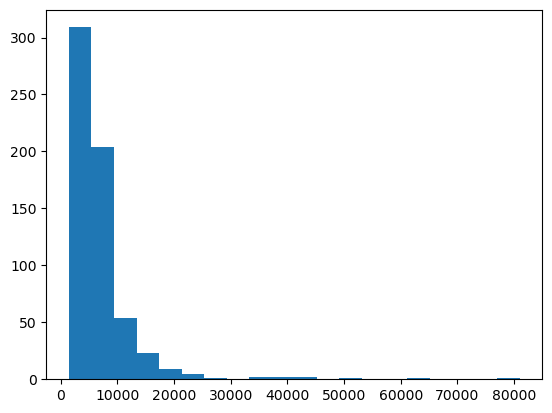

In [11]:
plt.hist(data['Toatl_Income'], bins=20)
plt.show()

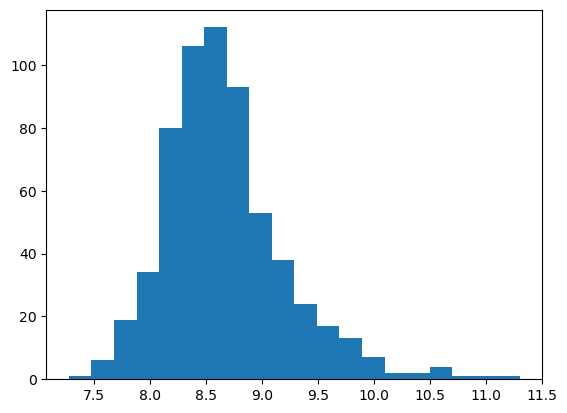

In [12]:
data['Total_Income_log'] = np.log(data['Toatl_Income'])
plt.hist(data['Total_Income_log'], bins=20)
plt.show()

In [13]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = data[i].fillna(data[i].mode()[0])
        
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Toatl_Income          0
Total_Income_log      0
dtype: int64

In [14]:
for i in data.columns:
    if data[i].dtypes == 'int64' or data[i].dtypes == 'float64':
        data[i] = data[i].fillna(data[i].mean())
        
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Toatl_Income         0
Total_Income_log     0
dtype: int64

In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Toatl_Income,Total_Income_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000,11.302204


In [16]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Toatl_Income,Total_Income_log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019156
Toatl_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.852873
Total_Income_log,0.717829,0.383827,0.687552,-0.055320,0.019156,0.852873,1.000000


Male      502
Female    112
Name: Gender, dtype: int64


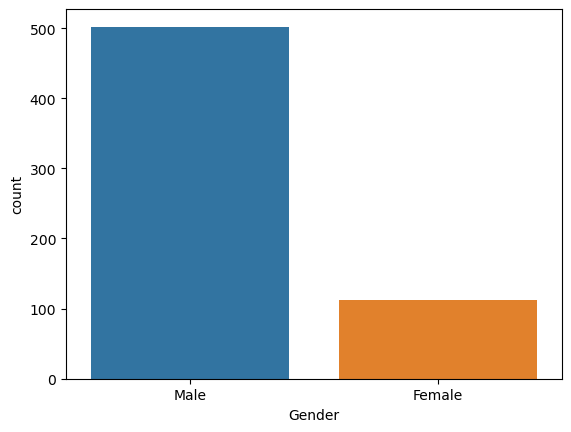

In [17]:
print(data['Gender'].value_counts())
sns.countplot(x ='Gender', data = data)
plt.show()

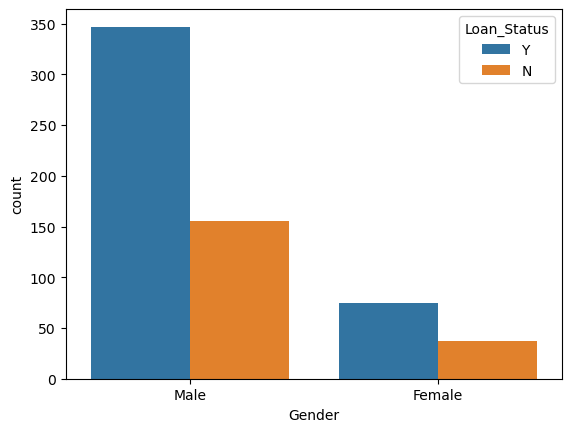

In [18]:
sns.countplot(x='Gender', data=data, hue = data['Loan_Status'])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


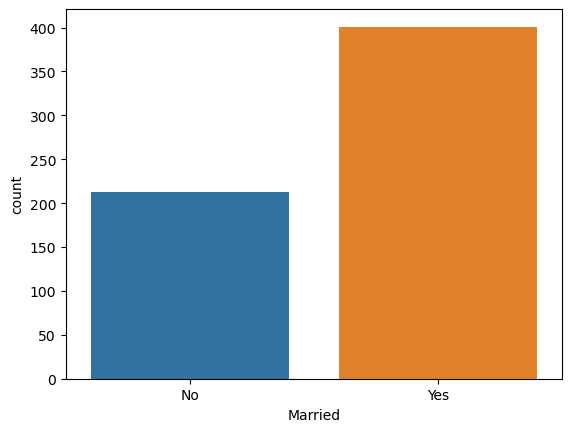

In [19]:
print(data['Married'].value_counts())
sns.countplot(x = data['Married'])
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


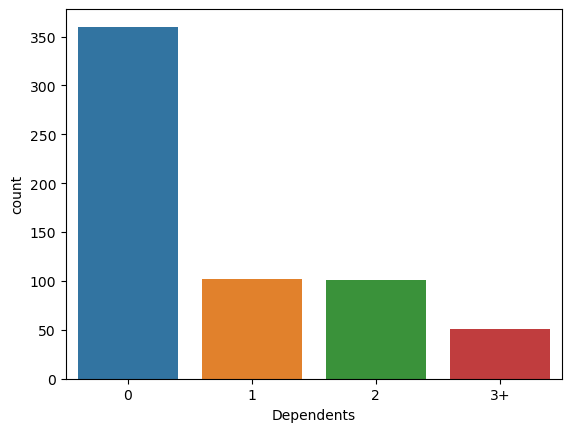

In [20]:
print(data['Dependents'].value_counts())
sns.countplot(x = data['Dependents'])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


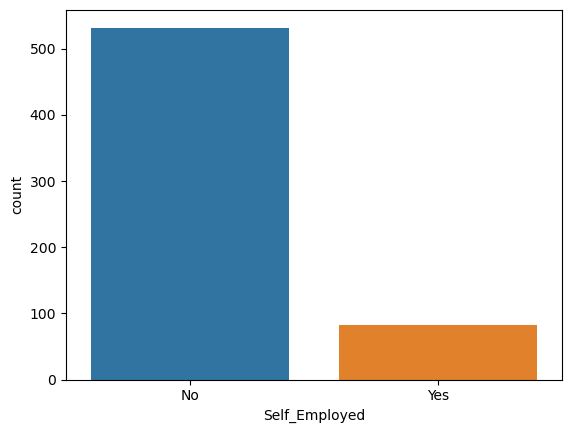

In [21]:
print(data['Self_Employed'].value_counts())
sns.countplot(x = data['Self_Employed'])
plt.show()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


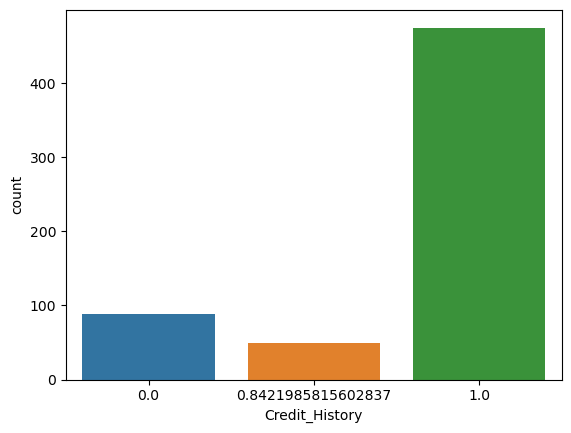

In [22]:
print(data['Credit_History'].value_counts())
sns.countplot(x = data['Credit_History'])
plt.show()

In [23]:
data['Loan_Status'] = data['Loan_Status'].replace(['Y','N'], [1,0])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])
    
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Toatl_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.000000,2,1,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.000000,0,0,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.000000,2,1,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.000000,2,1,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.000000,2,1,6000.0,8.699515
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.000000,2,1,9613.0,9.170872
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.000000,2,1,3849.0,8.255569
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.000000,1,0,5540.0,8.619750
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.000000,2,1,5532.0,8.618305
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.000000,1,0,23809.0,10.077819


In [25]:
col = list()
for i in data.columns:
    if i != 'Loan_Status':
        col.append(i)
col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Toatl_Income',
 'Total_Income_log']

In [26]:
x = data[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Toatl_Income','Total_Income_log']]
y = data[['Loan_Status']]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
x_test

array([[ 0.46671381, -1.25      , -0.64059361, ..., -0.03125   ,
         0.13465755,  0.43460206],
       [-2.14264068, -1.25      , -0.64059361, ..., -0.03125   ,
        -0.57724973, -0.69018858],
       [ 0.46671381,  0.8       , -0.64059361, ...,  1.25      ,
         0.87125093,  1.1945937 ],
       ...,
       [ 0.46671381,  0.8       , -0.64059361, ..., -0.03125   ,
         2.00431806,  2.00884568],
       [ 0.46671381,  0.8       ,  2.38990694, ...,  1.25      ,
        -0.48224564, -0.50211333],
       [ 0.46671381,  0.8       ,  0.36957324, ...,  1.25      ,
        -0.77723209, -1.14864   ]])

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred1))

Accuracy:  0.8455284552845529


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rfc.fit(x_train, y_train)
y_pred2 = rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))

Accuracy Score:  0.7886178861788617


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred3))

Accuracy:  0.6097560975609756


# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred4 = gnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred4))

Accuracy:  0.8455284552845529


# KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
y_pred5 = knc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred5))

Accuracy:  0.8130081300813008


#### Hence we can see that Logistic Regression and Naive Bayes model privides higher accuracy score of 84.55% which is comparatively greater than the accuracy of other models.